(160, 160, 96)
(160, 160, 96, 3)
(160, 160, 96)
(160, 160, 96, 3)
(160, 160, 96)
(160, 160, 96, 3)
(160, 160, 96)
(160, 160, 96, 3)


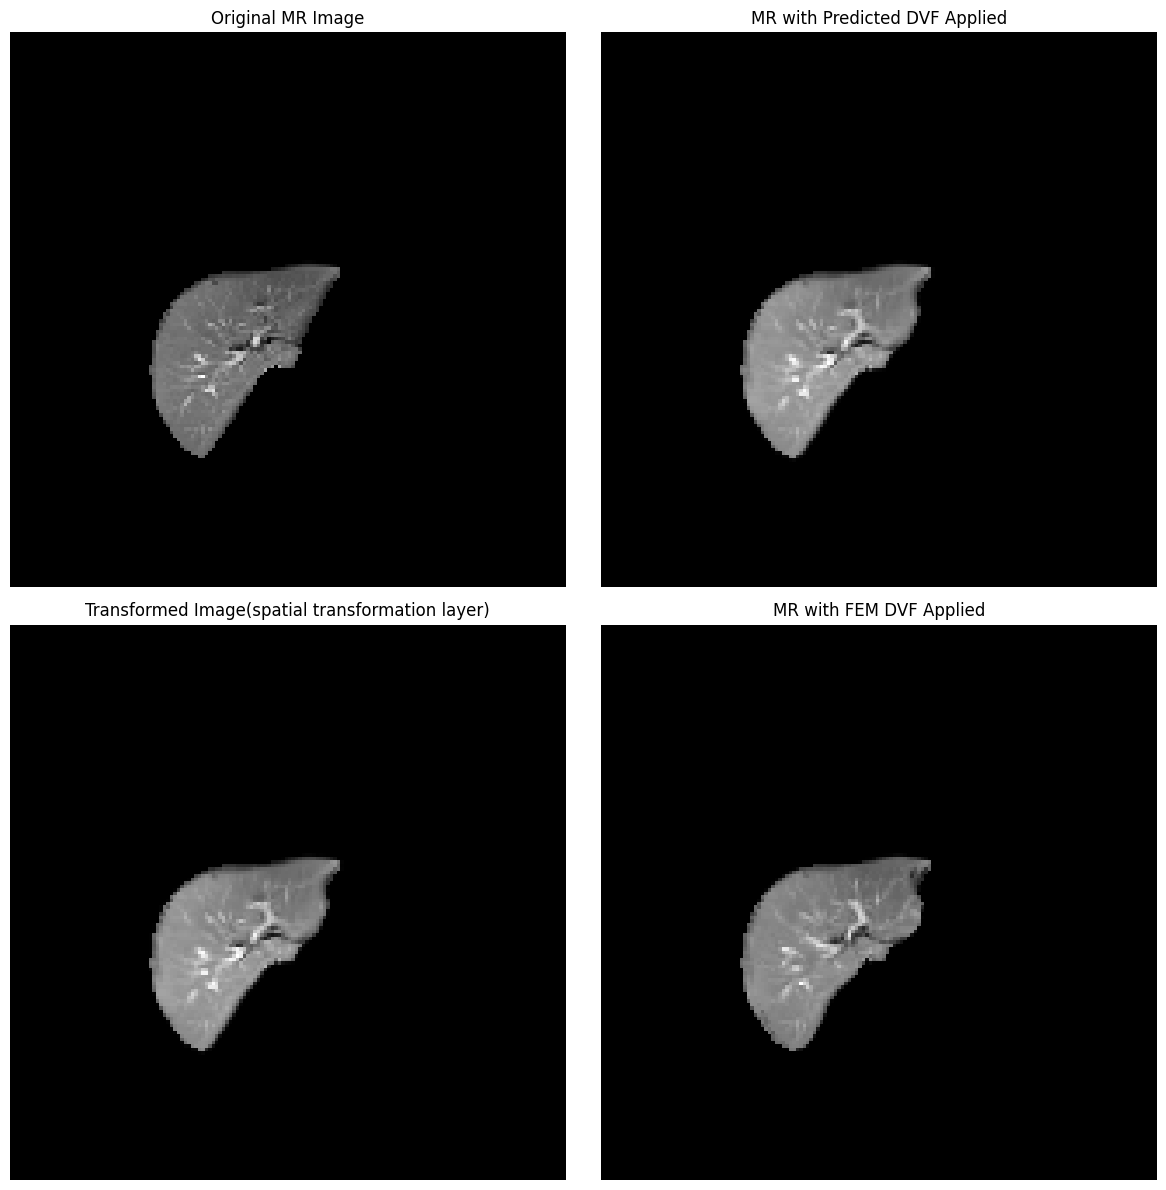

In [ ]:
#For real dataset
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import ndimage

def apply_dvf(prior, dvf):
    print(prior.shape)
    print(dvf.shape)
    # Check the order of the input dimensions
    if prior.ndim == 3:
        prior = np.transpose(prior, (1, 0, 2))
    elif prior.ndim == 4:
        prior = np.transpose(prior, (1, 0, 2, 3))
    
    if dvf.ndim == 4:
        dvf = np.transpose(dvf, (1, 0, 2, 3))
    print(prior.shape)
    print(dvf.shape)
    #  DVF
    dvf_x = np.flip(dvf[..., 0], axis=2)
    dvf_y = np.flip(dvf[..., 1], axis=2)
    dvf_z = -np.flip(dvf[..., 2], axis=2)
    
    dims = dvf_x.shape
    
    # Grid
    y, x, z = np.meshgrid(np.arange(dims[0]), np.arange(dims[1]), np.arange(dims[2]), indexing='ij')
    
    # Calculate the new coordinate
    new_x = dvf_x + x
    new_y = dvf_y + y
    new_z = dvf_z + z
    
    # Flip prior image
    prior = np.flip(prior, axis=2)  # head to foot
    
    # Interpolte with map_coordinates（Same concept with "interp3" in MATLAB）
    post = ndimage.map_coordinates(prior, [new_y, new_x, new_z], order=1, mode='constant', cval=0)
    
    # Back to original direction
    post = np.flip(post, axis=2)  # flip back, foot to head
    post = np.transpose(post, (1, 0, 2))  # permute back, x, y, z
    
    return post

# Path
image_func_path = r""
dvf_path = r""
pre_mr_path = r""
gt_dvf_path = r""

# Load data
image_func = loadmat(image_func_path)['transformed_image']
#image_trans = loadmat(image_trans_path)['transformed_image']
dvf = loadmat(dvf_path)['fem_dvf_160']
mr_image = loadmat(pre_mr_path)['mr_normed_mask']
fem_dvf = loadmat(gt_dvf_path)['fem_dvf_160']

# Apply DVF to MR image
dvf_applied = apply_dvf(mr_image, dvf)
fem_applied = apply_dvf(mr_image, fem_dvf)

# Visual on selected slice
slice_index = 45  # Adjust as you need

# For image display:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Orig MR img
axes[0, 0].imshow(mr_image[:, :, slice_index], cmap='gray')
axes[0, 0].set_title('Original MR Image')
axes[0, 0].axis('off')

# Apply predicted DVF on MR img
axes[0, 1].imshow(dvf_applied[:, :, slice_index], cmap='gray')
axes[0, 1].set_title('MR with Predicted DVF Applied')
axes[0, 1].axis('off')

# Transformed Image
axes[1, 0].imshow(image_func[0, :, :, slice_index], cmap='gray')
axes[1, 0].set_title('Transformed Image(spatial transformation layer)')
axes[1, 0].axis('off')

# Apply FEM DVF to MR img
axes[1, 1].imshow(fem_applied[:, :, slice_index], cmap='gray')
axes[1, 1].set_title('MR with FEM DVF Applied')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()




(160, 160, 96)
(160, 160, 96, 3)
(160, 160, 96)
(160, 160, 96, 3)
(160, 160, 96)
(160, 160, 96, 3)
(160, 160, 96)
(160, 160, 96, 3)


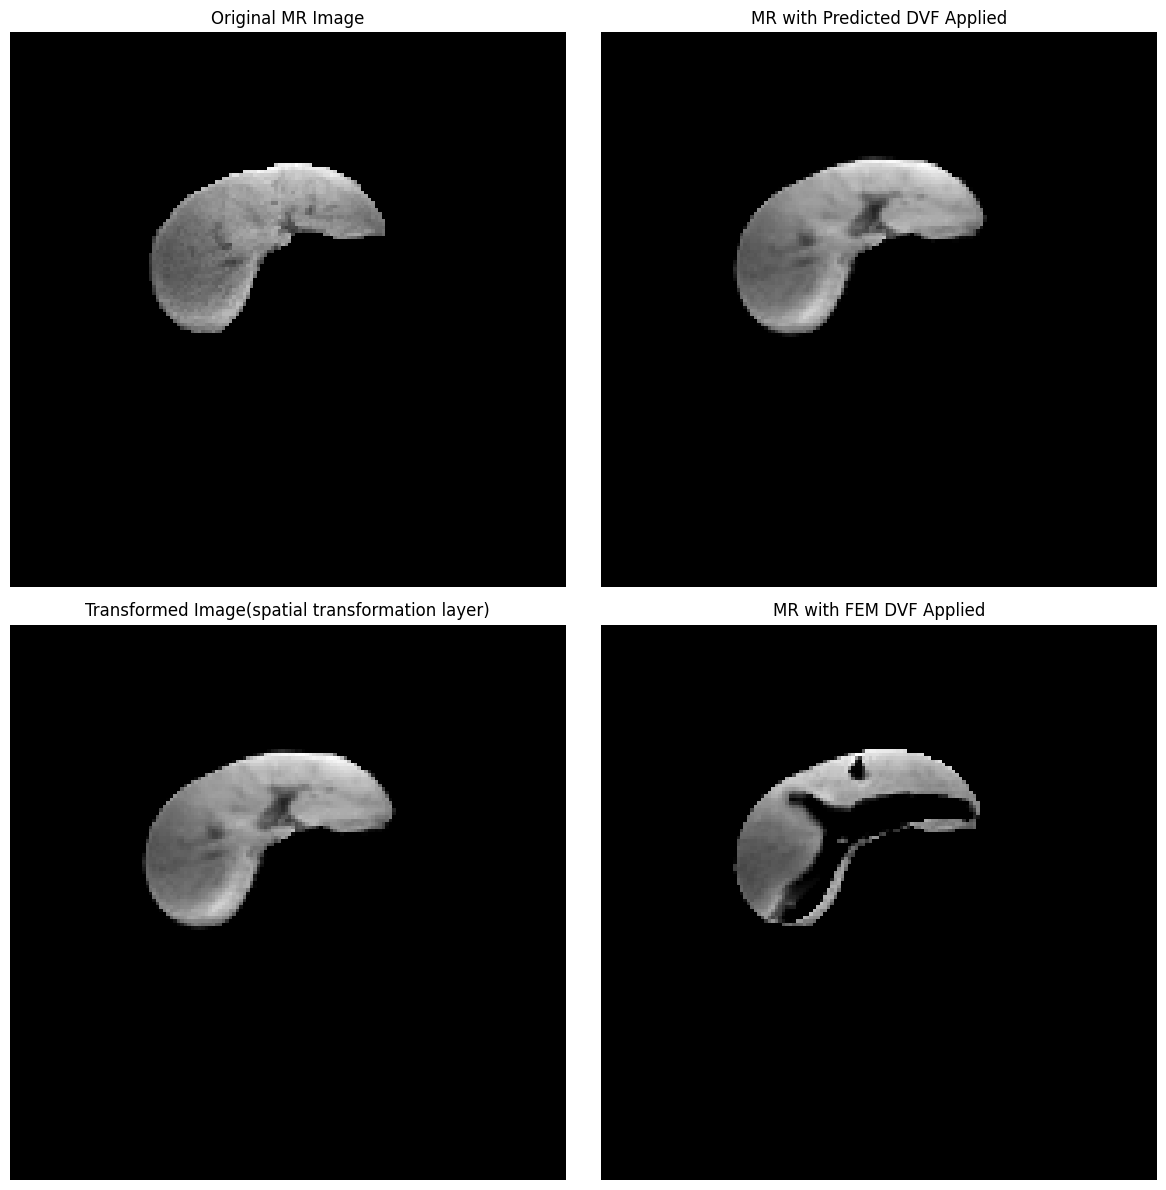

In [ ]:
#For sim dataset
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import ndimage

def apply_dvf(prior, dvf):
    print(prior.shape)
    print(dvf.shape)
    # Check dim
    if prior.ndim == 3:
        prior = np.transpose(prior, (1, 0, 2))
    elif prior.ndim == 4:
        prior = np.transpose(prior, (1, 0, 2, 3))
    
    if dvf.ndim == 4:
        dvf = np.transpose(dvf, (1, 0, 2, 3))
    print(prior.shape)
    print(dvf.shape)
    # DVF
    dvf_x = np.flip(dvf[..., 0], axis=2)
    dvf_y = np.flip(dvf[..., 1], axis=2)
    dvf_z = -np.flip(dvf[..., 2], axis=2)
    
    dims = dvf_x.shape
    
    # Create grid
    y, x, z = np.meshgrid(np.arange(dims[0]), np.arange(dims[1]), np.arange(dims[2]), indexing='ij')
    
    # Cal new coordinate
    new_x = dvf_x + x
    new_y = dvf_y + y
    new_z = dvf_z + z
    
    # Flip prior img
    prior = np.flip(prior, axis=2)  # head to foot
    
    # Use map_coordinates to interplote (MATLAB 的 interp3）
    post = ndimage.map_coordinates(prior, [new_y, new_x, new_z], order=1, mode='constant', cval=0)
    
    # Flip back
    post = np.flip(post, axis=2)  # flip back, foot to head
    post = np.transpose(post, (1, 0, 2))  # permute back, x, y, z
    
    return post

# PATH
image_func_path = r""
dvf_path = r""
pre_mr_path = r""
gt_dvf_path = r""

# Load data
image_func = loadmat(image_func_path)['transformed_image']
#image_trans = loadmat(image_trans_path)['transformed_image']
dvf = loadmat(dvf_path)['fem_dvf_160']
mr_image = loadmat(pre_mr_path)['mr_normed']
fem_dvf = loadmat(gt_dvf_path)['fem_dvf_160']

# Apply DVF to MR
dvf_applied = apply_dvf(mr_image, dvf)
fem_applied = apply_dvf(mr_image, fem_dvf)

# Slice visual
slice_index = 43  

# Img display:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Orig MR img
axes[0, 0].imshow(mr_image[:, :, slice_index], cmap='gray')
axes[0, 0].set_title('Original MR Image')
axes[0, 0].axis('off')

# Prediicted DVF to MR 
axes[0, 1].imshow(dvf_applied[:, :, slice_index], cmap='gray')
axes[0, 1].set_title('MR with Predicted DVF Applied')
axes[0, 1].axis('off')

# Transformed Image
axes[1, 0].imshow(image_func[0, :, :, slice_index], cmap='gray')
axes[1, 0].set_title('Transformed Image(spatial transformation layer)')
axes[1, 0].axis('off')

# Apply FEM DVF to MR 
axes[1, 1].imshow(fem_applied[:, :, slice_index], cmap='gray')
axes[1, 1].set_title('MR with FEM DVF Applied')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


